# Testing Image 3D Mapping 


In [7]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

In [8]:
import ipywidgets as widgets 
import skimage.io
import os
import random

from IPython.display import display
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import  numpy as np

%matplotlib nbagg

In [9]:
! curl -O https://mir-s3-cdn-cf.behance.net/project_modules/disp/96701647544579.56080a36b6483.png 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24900  100 24900    0     0   258k      0 --:--:-- --:--:-- --:--:--  258k


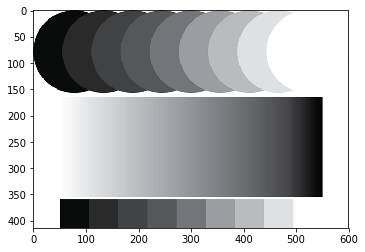

In [39]:
img = plt.imread('96701647544579.56080a36b6483.png ')
plt.imshow(img)

In [11]:
img.shape

(414, 600, 4)

(414, 600, 3)


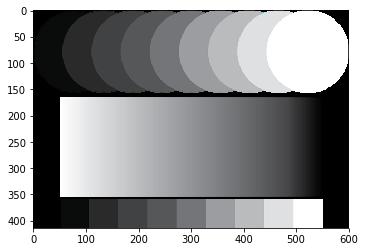

In [40]:
img_pil = img[:,:,:3]
print(img_pil.shape)
# img_pil = Image.fromarray(np.uint8(img_pil))
# img_pil = ImageOps.equalize(img_pil)
plt.imshow(img_pil)

2


AttributeError: 'list' object has no attribute 'ndim'

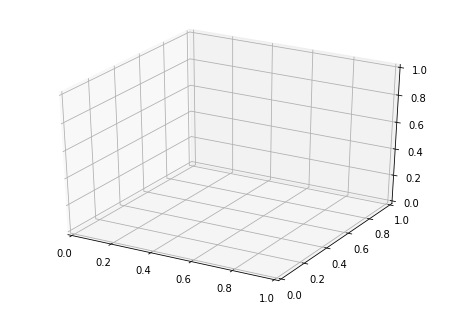

In [65]:
figure = plt.figure()
axis = Axes3D(figure)

height, width, depth = img_pil.shape
h = list(range(0,height))
w = list(range(0,width))
d = [h,w]
dray = np.asarray(d)
# print(dray)
print(dray.size)
# d = [np.meshgrid(h,w)]


R = np.sqrt(X ** 2 + Y ** 2)
# d = np.sin(R) 

# d = 1

# print(h, w, d)

# d = list(img_pil[:,:,0] + img_pil[:,:,1] + img_pil[:,:,2])

# ax.contourf(h, w, d, rstride=1, cstride=1, cmap=plt.cm.hot)
# ax.plot_surface(h, w, d, zdir='d', offset=-2, cmap=plt.cm.hot)
ax.plot_surface(h, w, d, rstride=1, cstride=1, cmap=plt.cm.hot)
plt.show()

[[     0      1      2 ...    597    598    599]
 [   600    601    602 ...   1197   1198   1199]
 [  1200   1201   1202 ...   1797   1798   1799]
 ...
 [246600 246601 246602 ... 247197 247198 247199]
 [247200 247201 247202 ... 247797 247798 247799]
 [247800 247801 247802 ... 248397 248398 248399]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

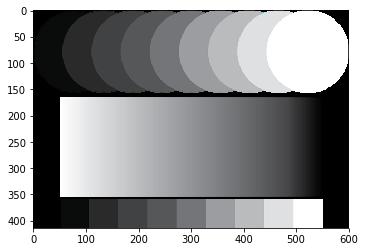

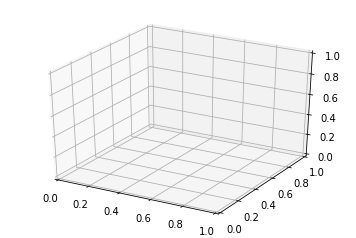

In [165]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#     linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Original Code')

print(surf)


# ~~~~ MODIFICATION TO EXAMPLE BEGINS HERE ~~~~ #
import pandas as pd
from scipy.interpolate import griddata
# create 1D-arrays from the 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# add in the values we really want
height, width, depth = img_pil.shape

x1=np.asarray(list(range(0,height)))
y1=np.asarray(list(range(0,width)))
x2, y2 = np.meshgrid(x1, y1)

z1 = np.asarray(list(range(0,(height * width))))
z2 = np.reshape(z1, (-1, width))

# plt.imshow(img_pil)
# print(z2)

# z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

# re-create the 2D-arrays
# x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
# y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
# x2, y2 = np.meshgrid(x1, y1)
# z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

print(surf)

plt.show()

# Stuff  to plot 2D things

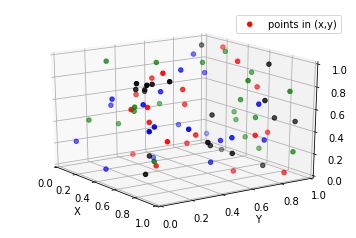

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5
# ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
z = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, z, zdir='z', c=c_list, label='points in (x,y)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

# New test things

[0.7003673  0.74275081 0.70928001 0.56674552 0.97778533 0.70633485
 0.24791576 0.15788335 0.69769852 0.71995667 0.25774443 0.34154678
 0.96876117 0.6945071  0.46638326 0.7028127  0.51178587 0.92874137
 0.7397693  0.62243903]
[0.65154547 0.39680761 0.54323939 0.79989953 0.72154473 0.29536398
 0.16094588 0.20612551 0.13432539 0.48060502 0.34252181 0.36296929
 0.97291764 0.11094361 0.38826409 0.78306588 0.97289726 0.48320961
 0.33642111 0.56741904]
[0.04794151 0.38893703 0.90630365 0.16101821 0.74362113 0.63297416
 0.32418002 0.92237653 0.23722644 0.82394557 0.75060714 0.11378445
 0.84536125 0.92393213 0.22083679 0.93305388 0.48899874 0.47471864
 0.08916747 0.22994818]


FloatSlider(value=0.0)

IntSlider(value=0)

0.0

0

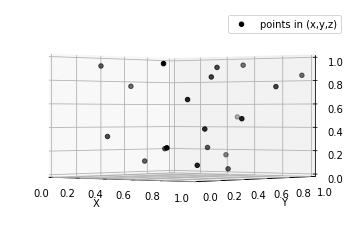

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5
# ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('k')
# colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

# x1=np.asarray(list(range(0,height)))
# y1=np.asarray(list(range(0,width)))
# x2, y2 = np.meshgrid(x1, y1)

# x=x1
# y=y1

# plt.imshow(img_pil)
# print(img_pil)
# z1 = 

x = np.random.sample(20 * len(colors))
print(x)
y = np.random.sample(20 * len(colors))
print(y)
z = np.random.sample(20 * len(colors))
print(z)

c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, z, zdir='z', c=c_list, label='points in (x,y,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

from IPython.display import display
w = widgets.FloatSlider()
display(w)

v = widgets.IntSlider()
display(v)

ax.view_init(elev= w.value / 2., azim= v.value - 50)

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
# ax.view_init(elev=20., azim=-35)

plt.show()

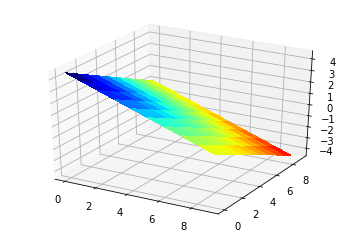

In [195]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

point = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')

Gx, Gy = np.gradient(xx * yy)  # gradients with respect to x and y
G = (Gx ** 2 + Gy ** 2) ** .5  # gradient magnitude
N = G / G.max()  # normalize 0..1

plt3d.plot_surface(xx, yy, z, rstride=1, cstride=1,
                   facecolors=cm.jet(N),
                   linewidth=0, antialiased=False, shade=False
)
plt.show()

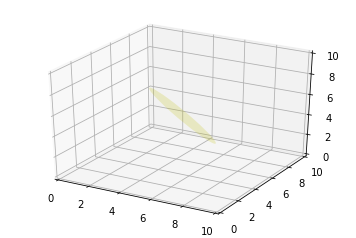

In [194]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Circle, PathPatch
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d
import numpy as np

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='y'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .2)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')  
plot_plane(ax, o, n, size=3)    
ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
plt.show()

In [162]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

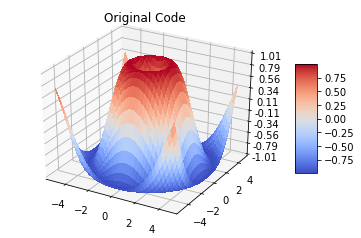

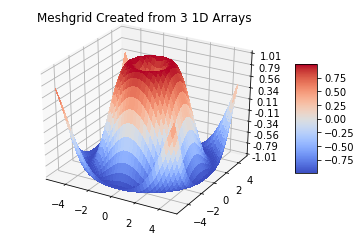

In [154]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')

print(surf)


# ~~~~ MODIFICATION TO EXAMPLE BEGINS HERE ~~~~ #
import pandas as pd
from scipy.interpolate import griddata
# create 1D-arrays from the 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

print(surf)

plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,) and requested shape (10,)

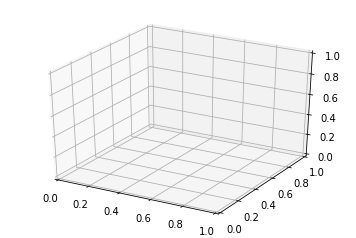

In [130]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = list(range(0,10))
y = list(range(0,10))
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


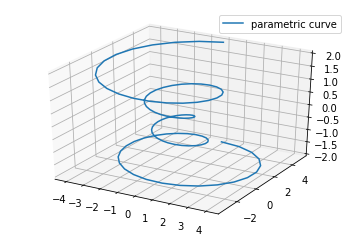

In [126]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


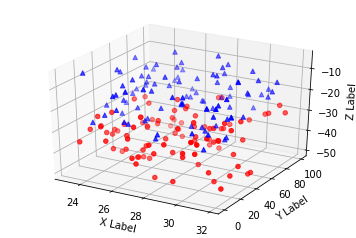

In [87]:
'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [82]:
%%bash 
$ pip install plotly 

SyntaxError: invalid syntax (<ipython-input-82-d9ca2cc4b143>, line 2)

In [78]:
%lsmagic
# $ pip install plotly 

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [67]:
import plotly
plotly.__version__

ModuleNotFoundError: No module named 'plotly'

In [66]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

ModuleNotFoundError: No module named 'plotly'

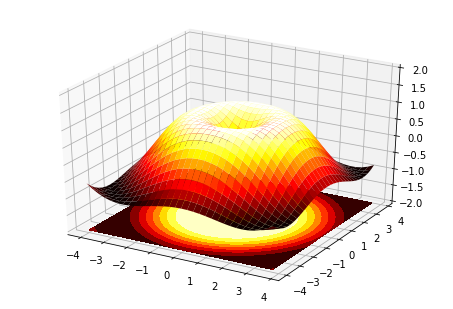

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()